In [2]:
from concurrent.futures import ProcessPoolExecutor, as_completed, ThreadPoolExecutor
import cv2
import multiprocessing
import os
import sys
import time
import pandas as pd
from PIL import Image
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import pytesseract
import re
import numpy as np

In [3]:
videopath = 'cockpitview/Copy of F44R-C4-PilotBroomCloset 2018-04-17_13_50_06_294.mp4/'
listocr = []
images = os.listdir(videopath)

In [4]:
from PIL import Image

def get_ocr(path):
    '''
    This function takes a path to a folder of images and returns a list of the text in each image
    '''
    text=[]
    image=[]
    dirs = os.listdir(path)
    for crop in dirs:
        if crop =='.DS_Store':
            pass
        else:
            tmp=pytesseract.image_to_string(Image.open(path + crop))
            text.append(tmp)
            image.append(crop)
#             time.sleep(0.01)
    return text,image

In [5]:
def main():
    with ThreadPoolExecutor(max_workers=2) as executor:
        future = executor.submit(get_ocr, videopath) 
        
    ocr = future.result()
    return ocr 

In [6]:
timestamp, imagepath = main()
print('TIMESTAMP:',timestamp[:2])
print('IMAGEPATH:',imagepath[:2])

TIMESTAMP: ['PILOT BROOM 2018-04-17 14:\n\n \n\n08:25.58\n\x0c', 'PILOT BROOM 2018-04-17 14:08:26.58\n\nNY\n\n     \n\x0c']
IMAGEPATH: ['10_Copy of F44R-C4-PilotBroomCloset 2018-04-17_13_50_06_294.mp4.jpeg', '11_Copy of F44R-C4-PilotBroomCloset 2018-04-17_13_50_06_294.mp4.jpeg']


In [7]:
df = pd.DataFrame({'Timestamp':timestamp, 'imagepath':imagepath})
df.head(3)

,Timestamp,imagepath
0,PILOT BROOM 2018-04-17 14:\n\n \n\n08:25.58\n,10_Copy of F44R-C4-PilotBroomCloset 2018-04-17...
1,PILOT BROOM 2018-04-17 14:08:26.58\n\nNY\n\n ...,11_Copy of F44R-C4-PilotBroomCloset 2018-04-17...
2,PILOT BROOM 2018-04-17 14:08:27.64\n\n \n,12_Copy of F44R-C4-PilotBroomCloset 2018-04-17...


In [8]:
def get_time(x):
    '''
    This function takes a string and returns the time in the string
    '''
    df['Timestamp'] = df['Timestamp'].apply(lambda x: re.search(r'(\d{2}:\d{2}:\d{2}.\d{2})', x).group(0) if re.search(r'\d{2}:\d{2}:\d{2}', x) is not None else np.nan)
    df['Timestamp'] = pd.to_datetime(df['Timestamp']) + pd.Timedelta(hours=4)
    df['Timestamp'] = df['Timestamp'].dt.time
    df['Timestamp'] = df['Timestamp'].apply(lambda x: str(x))
    df['Timestamp'] = df['Timestamp'].apply(lambda x: x[:-5])
    # add a zero to the end of the timestamp
    df['Timestamp'] = df['Timestamp'].apply(lambda x: x + '0')
    return df

df = get_time(df)

In [9]:
df.head()

,Timestamp,imagepath
0,0,10_Copy of F44R-C4-PilotBroomCloset 2018-04-17...
1,18:08:26.50,11_Copy of F44R-C4-PilotBroomCloset 2018-04-17...
2,18:08:27.60,12_Copy of F44R-C4-PilotBroomCloset 2018-04-17...
3,18:08:28.50,13_Copy of F44R-C4-PilotBroomCloset 2018-04-17...
4,18:08:29.40,14_Copy of F44R-C4-PilotBroomCloset 2018-04-17...


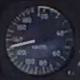

In [11]:
# display the 11_Copy of F44R-C4-PilotBroomCloset 2018-04-17... image
Image.open('gauge_images/airspeed/Copy of F44R-C4-PilotBroomCloset 2018-04-17_13_50_06_294.mp4/11_Copy of F44R-C4-PilotBroomCloset 2018-04-17_13_50_06_294.mp4.jpeg')

In [10]:
df_gt = pd.read_csv('gt/04-17-2018_HEIMCombined.csv')
df_gt[14435:14450]

,Timestamp,Altitude(ft),Baro Corrected Altitude(ft),True Airspeed(kn),Computed Airspeed(kn),Static Air Temperature(C),Date,True Heading(deg),Mag Heading(deg),Pitch Angle(deg),...,Oil T 1(C),Oil T 2(C),Collective Pos(V),Cyclic Roll(V),Cyclic Pitch(V),Pedal Pos(V),Copilot Rad Alt(ft),GNSS Altitude MSL(ft),GNSS Height HAE(ft),Total Torque(%)
14435,18:08:26.40,1155.0,973.0,131.6250,131.5625,3.25,4/17/2018,-142.268143,-130.011520,-0.540733,...,48.87,56.20,-0.068359,0.042114,-0.130005,-0.046997,940.5,987.5,874.875,1.11
14436,18:08:26.50,1154.0,972.5,131.3750,131.5000,3.25,4/17/2018,-142.271919,-130.011658,-0.510452,...,48.87,56.20,-0.067749,0.041504,-0.130005,-0.046997,939.5,987.5,874.875,1.11
14437,18:08:26.60,1154.0,972.0,131.3750,131.5000,3.25,4/17/2018,-142.271576,-130.013855,-0.489235,...,48.87,56.20,-0.068359,0.040894,-0.130615,-0.046387,939.5,987.5,874.875,1.11
14438,18:08:26.70,1152.0,971.0,131.3750,131.3750,3.25,4/17/2018,-142.289085,-130.036240,-0.487793,...,48.88,56.20,-0.067749,0.041504,-0.130615,-0.047607,938.5,987.5,874.875,1.11
14439,18:08:26.80,1152.0,970.0,131.3750,131.3750,3.25,4/17/2018,-142.319641,-130.070160,-0.505028,...,48.90,56.20,-0.067749,0.040894,-0.130615,-0.048218,937.0,987.5,874.875,1.10
14440,18:08:26.90,1151.5,970.0,131.1875,131.2500,3.25,4/17/2018,-142.363586,-130.117676,-0.521370,...,48.92,56.20,-0.067749,0.041504,-0.131226,-0.048828,936.0,987.5,874.875,1.11
14441,18:08:27.00,1151.0,969.0,131.1875,131.2500,3.25,4/17/2018,-142.409592,-130.159012,-0.535103,...,48.94,56.20,-0.067749,0.041504,-0.130615,-0.049438,936.0,987.5,874.875,1.11
14442,18:08:27.10,1151.0,969.0,131.1875,131.2500,3.25,4/17/2018,-142.441177,-130.190597,-0.542038,...,48.94,56.20,-0.067749,0.038452,-0.130615,-0.050659,936.0,987.5,874.875,1.11
14443,18:08:27.20,1151.0,969.0,131.1875,131.2500,3.25,4/17/2018,-142.474823,-130.226852,-0.543823,...,48.94,56.19,-0.067749,0.040894,-0.131226,-0.050049,934.5,983.5,870.875,1.11
14444,18:08:27.30,1151.0,969.0,131.3750,131.4375,3.25,4/17/2018,-142.511559,-130.263794,-0.535721,...,48.94,56.19,-0.067749,0.040894,-0.130615,-0.051880,934.0,983.5,870.875,1.11


In [12]:
# join the csv files together and map the timestamp to the imagepath
df_merged = df.merge(df_gt, on='Timestamp', how='left')

In [13]:
df_merged.head(3)

,Timestamp,imagepath,Altitude(ft),Baro Corrected Altitude(ft),True Airspeed(kn),Computed Airspeed(kn),Static Air Temperature(C),Date,True Heading(deg),Mag Heading(deg),...,Oil T 1(C),Oil T 2(C),Collective Pos(V),Cyclic Roll(V),Cyclic Pitch(V),Pedal Pos(V),Copilot Rad Alt(ft),GNSS Altitude MSL(ft),GNSS Height HAE(ft),Total Torque(%)
0,0,10_Copy of F44R-C4-PilotBroomCloset 2018-04-17...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18:08:26.50,11_Copy of F44R-C4-PilotBroomCloset 2018-04-17...,1154.0,972.5,131.375,131.500,3.25,4/17/2018,-142.271919,-130.011658,...,48.87,56.20,-0.067749,0.041504,-0.130005,-0.046997,939.5,987.5,874.875,1.11
2,18:08:27.60,12_Copy of F44R-C4-PilotBroomCloset 2018-04-17...,1150.0,968.0,131.375,131.375,3.25,4/17/2018,-142.592583,-130.341659,...,48.92,56.17,-0.068359,0.041504,-0.130005,-0.052490,938.0,983.5,870.875,1.11


In [14]:
column_of_interest = ['Timestamp', 'imagepath', 'True Airspeed(kn)']
df_merged = df_merged[column_of_interest]

In [15]:
# convert the True Airspeed(kn) column to int 
import math
df_merged['True Airspeed(kn)'] = [int(ts) if not math.isnan(ts) else None for ts in df_merged['True Airspeed(kn)']]

In [17]:
# drop the rows with null values
df_merged = df_merged.dropna()
df_merged.head(3)

,Timestamp,imagepath,True Airspeed(kn)
1,18:08:26.50,11_Copy of F44R-C4-PilotBroomCloset 2018-04-17...,131.0
2,18:08:27.60,12_Copy of F44R-C4-PilotBroomCloset 2018-04-17...,131.0
3,18:08:28.50,13_Copy of F44R-C4-PilotBroomCloset 2018-04-17...,130.0


In [18]:
df_merged.to_csv('train.csv', index=False)